In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
import itertools
from Datasets import wind_order_forcings, warm_order_forcings,\
exp_set_dict_wind_order, exp_set_dict_warm_order,\
colors_dict, all_runs_wind_order
import Functions_data_analysis as fda
import Functions_load_output as flo

In [6]:
# Get control run melt rates

# get ice shelf fw fluxes
ctrl_ice_fw_loc = 'inner_shelf_corner'
lat1, lat2, lon1, lon2 = fda.analysis_region_dict[ctrl_ice_fw_loc]
ctrl_ice_fw_full = flo.load_experiment_ds('control', 'all', 'iceshelf_state_set2').SHIfwFlx
ctrl_ice_fw_reg = ctrl_ice_fw_full.sel(lat=slice(lat1, lat2), lon=slice(lon1, lon2))
ctrl_ice_fw_nan = ctrl_ice_fw_reg.where(ctrl_ice_fw_reg != 0)
ctrl_ice_fw_nan_tseries = ctrl_ice_fw_nan.mean(dim='lat')
ctrl_ice_fw_tseries = ctrl_ice_fw_nan_tseries.mean(dim='lon')

# #get ice shelf area
ctrl_region_areas = fda.calc_grid_areas(ctrl_ice_fw_reg) # calc grid sizes of inner shelf corner
ctrl_ice_shelf_areas = ctrl_region_areas[np.where(ctrl_ice_fw_reg != 0)] # only keep grid sizes where ice shelves are
ctrl_ice_shelf_area = np.sum(ctrl_ice_shelf_areas) # PIG + Thwaites areas in m^2

#convert to m/yr
rho_fw = 1000
sec_per_year = 60*60*24*365.25
ctrl_melt_rate = ctrl_ice_fw_tseries / rho_fw * sec_per_year


distance between first set of lats: -75.002884 -75.02613 : 2584.922344099872 meters
distance between first set of lons: -108.958336 -108.875 , 9266.526670368372 meters


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

Text(0.5, 1.0, 'Control run ice shelf melt rate')

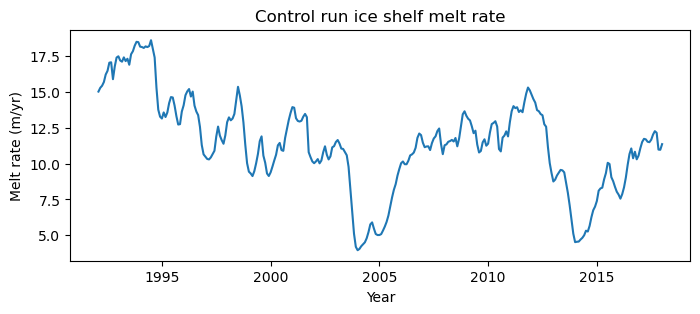

In [4]:
# Plot control run melt rates
plt.figure(figsize=(8,3))
plt.plot(np.linspace(1992+(1/12),2018,312,endpoint=True),-ctrl_melt_rate)
plt.ylabel('Melt rate (m/yr)')
plt.xlabel('Year')
plt.title ('Control run ice shelf melt rate')

In [5]:
# Get min, mean, and max of control run melt rates
ctrl_melt = -ctrl_melt_rate.values
np.min(ctrl_melt), np.mean(ctrl_melt), np.max(ctrl_melt)

(3.9670162, 11.39607, 18.583807)

In [ ]:
# Plot ice shelf melt region at a random timestep to visualize area
rho_fw = 1000
sec_per_year = 60*60*24*365.25
melt_rate = -ctrl_ice_fw_reg/rho_fw*sec_per_year
discharge_rate = melt_rate * ctrl_ice_shelf_area * 917 / 10e12
(discharge_rate).plot(cbar_kwargs={'label':'Ice Shelf Melt Rate (Gt/yr)'})